<a href="https://colab.research.google.com/github/vmpreciado/NETS3120/blob/main/CentralitiesZachary1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Illustrate edge centrality, closeness centrality and node betweenness centrality and edge betweenness centrality in the zachary's network.

Load Zachary's Karate Club graph and compute the positions of nodes using the spring layout to ensure consistent node positioning across all visualizations. This layout algorithm positions nodes using a force-directed approach, which visually separates nodes in a way that reflects the structure of the graph.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Load Zachary's Karate Club graph
G = nx.karate_club_graph()

# Get positions for the nodes in the graph
pos = nx.spring_layout(G)

Let's define a function to draw the graph with nodes colored and sized according to their centrality values. The function normalizes the centrality values for visual representation, making higher centrality values more visually prominent. This allows for easy identification of nodes that are more central according to the chosen centrality measure.

In [2]:
# Function to draw the graph with specific node properties
def draw_graph_with_centrality(G, node_values, title, pos):
    # Normalize node values for color and size mapping
    node_values_normalized = [v * 1000 for v in node_values.values()]

    plt.figure(figsize=(12, 10))
    nx.draw(G, pos, with_labels=True, node_color=node_values_normalized,
            node_size=node_values_normalized, cmap=plt.cm.viridis)
    plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label=title)
    plt.title(title)
    plt.show()

Let's visualize the degree centrality of the network, where the size and color of each node indicate its degree centrality. Nodes with more connections are highlighted, helping to identify highly connected individuals in the club.

<ipython-input-2-990eb1620e28>:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label=title)


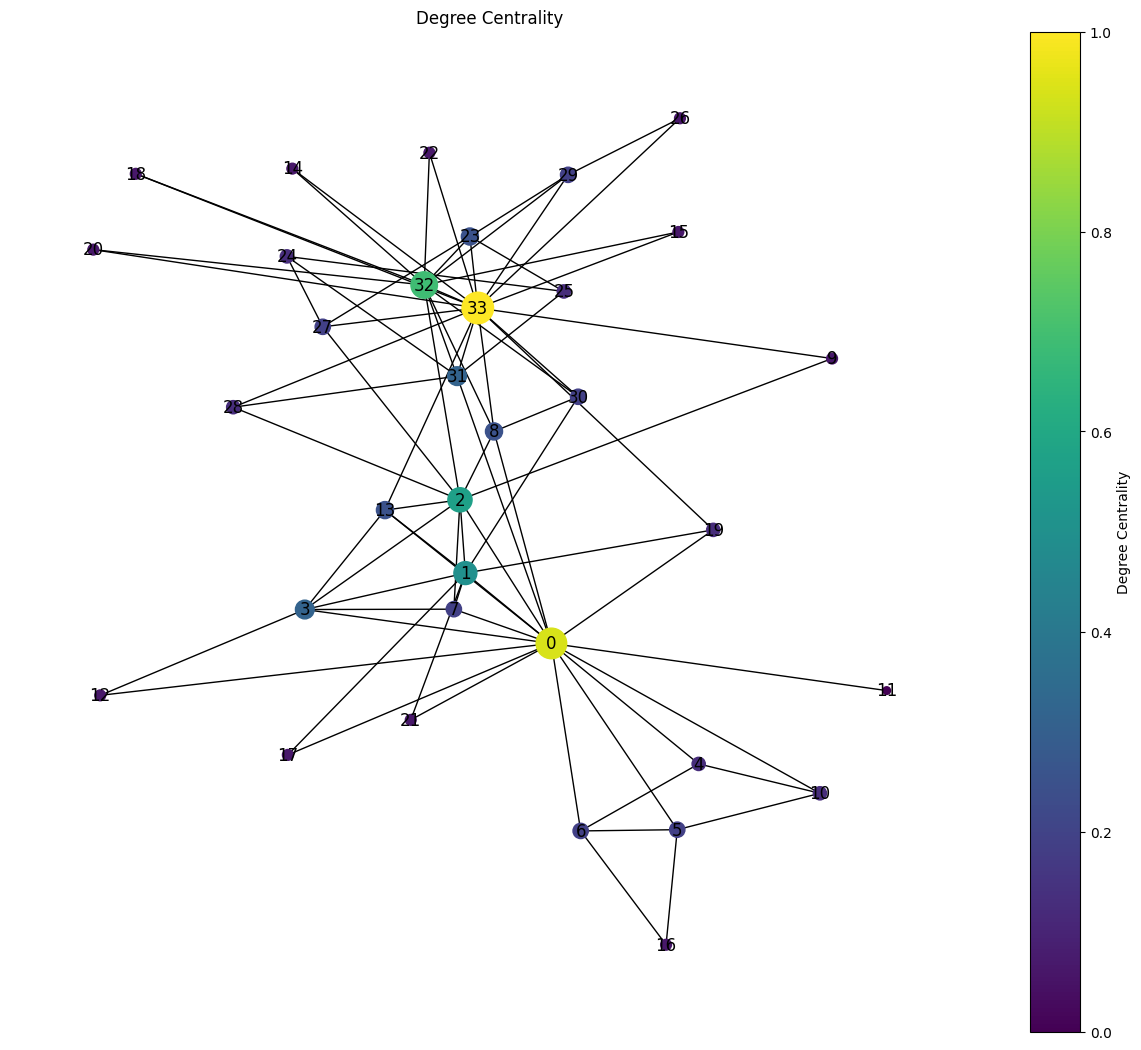

In [3]:
# Degree Centrality
degree_centrality = nx.degree_centrality(G)
draw_graph_with_centrality(G, degree_centrality, 'Degree Centrality', pos)

Let's visualize the closeness centrality of the network. This measure highlights nodes that are, on average, close to all other nodes in the network. Nodes with higher closeness centrality can spread information efficiently through the network due to their shorter paths to all other nodes.

<ipython-input-2-990eb1620e28>:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label=title)


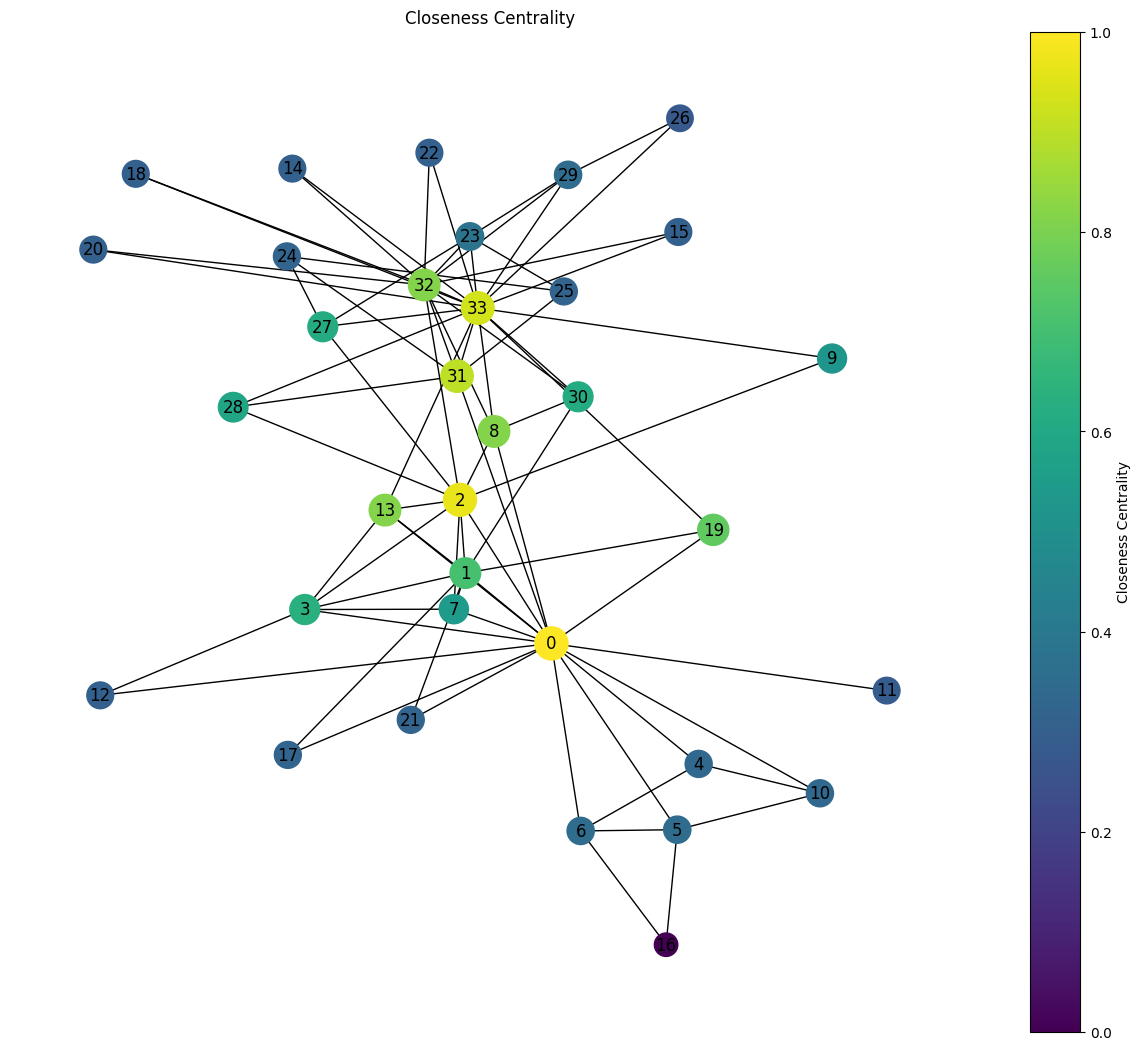

In [4]:
# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
draw_graph_with_centrality(G, closeness_centrality, 'Closeness Centrality', pos)

Visualize the node betweenness centrality, emphasizing nodes that frequently act as bridges along the shortest paths between other nodes. Such nodes can have a considerable influence on the flow of information in the network, as they lie on many of the shortest paths.

<ipython-input-2-990eb1620e28>:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label=title)


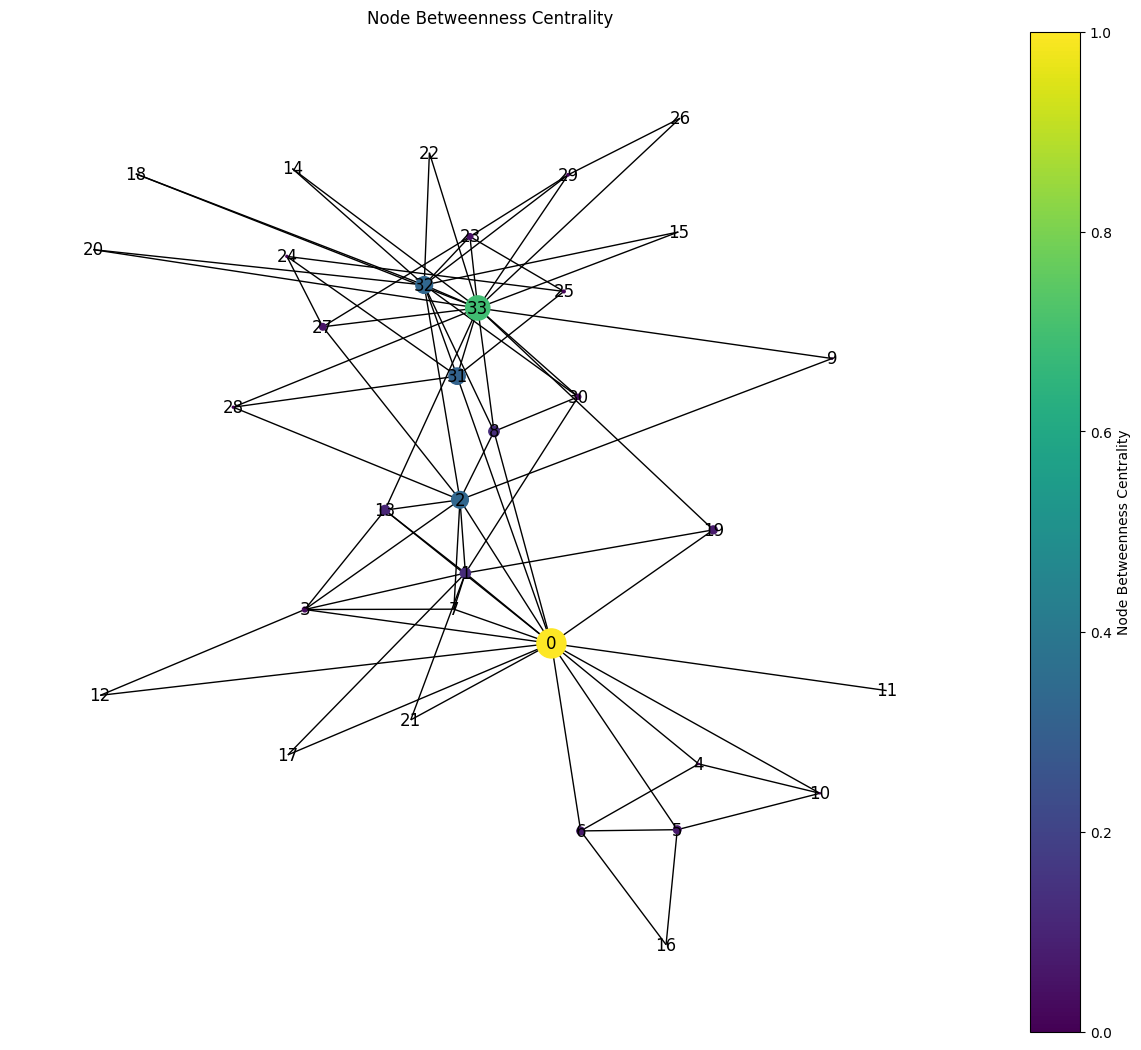

In [5]:
# Betweenness Centrality
node_betweenness_centrality = nx.betweenness_centrality(G)
draw_graph_with_centrality(G, node_betweenness_centrality, 'Node Betweenness Centrality', pos)

Let's compute now the edge betweenness centrality of all edges and visualize the result.

<ipython-input-6-309e6502990c>:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Edge Betweenness Centrality')


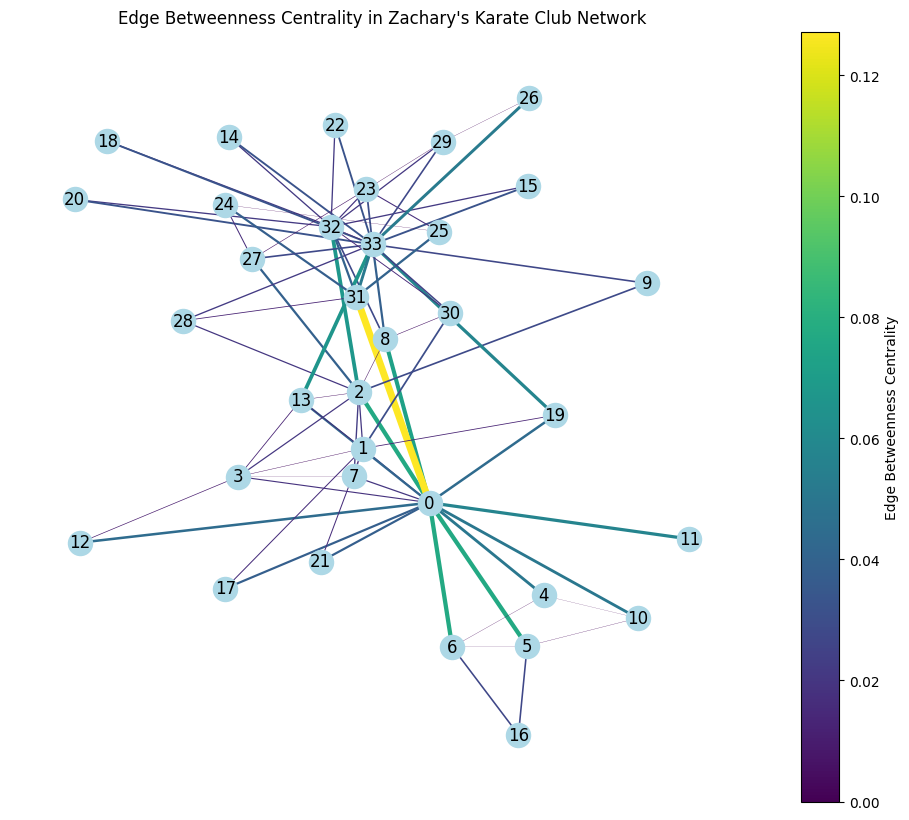

In [6]:
# Compute edge betweenness centrality
edge_betweenness = nx.edge_betweenness_centrality(G)
# Normalize for visualization purposes
max_ebc = max(edge_betweenness.values())
normalized_ebc = {e: v / max_ebc for e, v in edge_betweenness.items()}

plt.figure(figsize=(12, 10))
# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=300)
# Draw edges with edge betweenness centrality represented by color and width
edges, ebc_values = zip(*normalized_ebc.items())
nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=ebc_values, edge_cmap=plt.cm.viridis,
                       width=[v * 5 for v in ebc_values])
# Draw labels
nx.draw_networkx_labels(G, pos)
# Add color bar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=max_ebc))
sm._A = []
plt.colorbar(sm, label='Edge Betweenness Centrality')
plt.title('Edge Betweenness Centrality in Zachary\'s Karate Club Network')
plt.axis('off')
plt.show()


Let's put all the plots together for comparison...

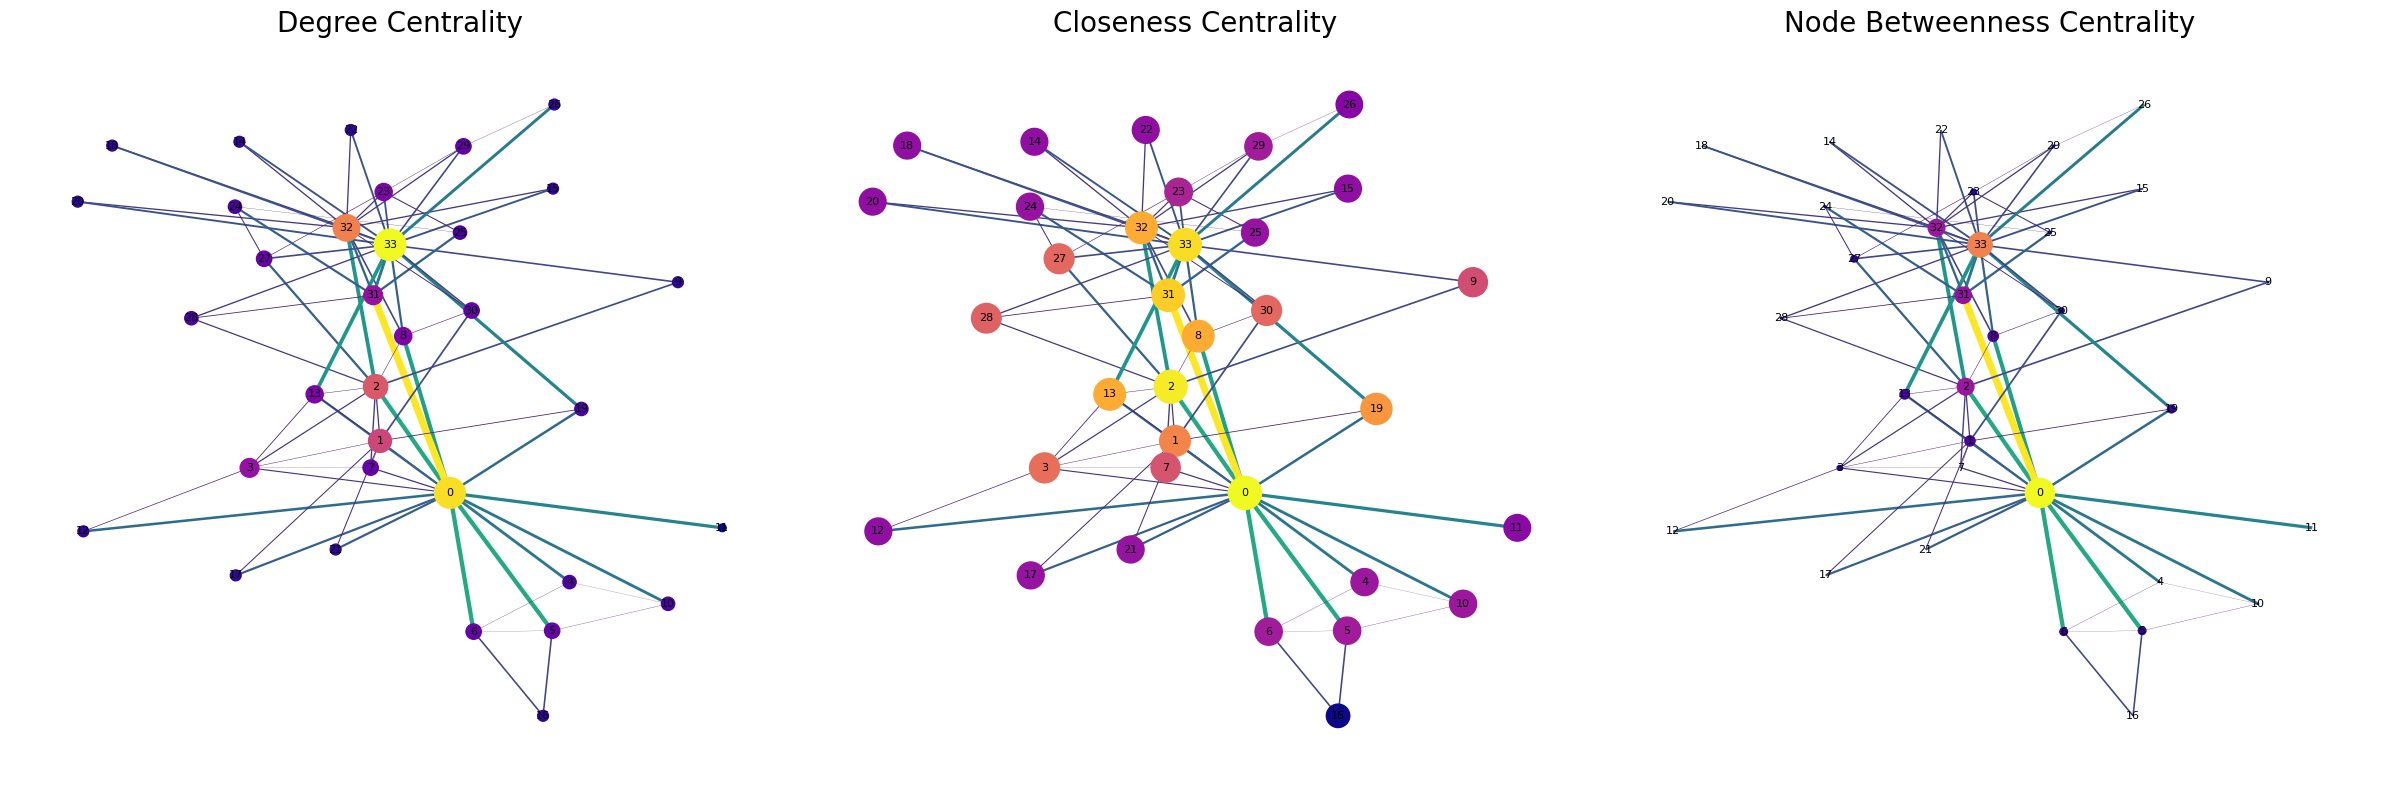

In [10]:
# Normalize for visualization purposes
max_degree = max(degree_centrality.values())
max_closeness = max(closeness_centrality.values())
max_node_betweenness = max(node_betweenness_centrality.values())
max_edge_betweenness = max(edge_betweenness.values())

edges, edge_betw_values = zip(*edge_betweenness.items())
edge_colors = [edge_betweenness[e] / max_edge_betweenness for e in G.edges()]
edge_widths = [edge_betweenness[e] * 5 / max_edge_betweenness for e in G.edges()]

fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Helper function to draw the network
def draw_network(ax, G, pos, node_sizes, node_colors, title):
    nx.draw_networkx_edges(G, pos, ax=ax, edgelist=edges, edge_color=edge_colors, width=edge_widths, edge_cmap=plt.cm.viridis)
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.plasma)
    nx.draw_networkx_labels(G, pos, ax=ax, font_size=8)
    ax.set_title(title, fontsize=20)
    ax.axis('off')

# Degree Centrality Plot
node_colors = [degree_centrality[n] for n in G.nodes()]
node_sizes = [degree_centrality[n] * 1000 for n in G.nodes()]
draw_network(axes[0], G, pos, node_sizes, node_colors, 'Degree Centrality')

# Closeness Centrality Plot
node_colors = [closeness_centrality[n] for n in G.nodes()]
node_sizes = [closeness_centrality[n] * 1000 for n in G.nodes()]
draw_network(axes[1], G, pos, node_sizes, node_colors, 'Closeness Centrality')

# Node Betweenness Centrality Plot
node_colors = [node_betweenness_centrality[n] for n in G.nodes()]
node_sizes = [node_betweenness_centrality[n] * 1000 for n in G.nodes()]
draw_network(axes[2], G, pos, node_sizes, node_colors, 'Node Betweenness Centrality')

plt.tight_layout()
plt.show()